In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_treasure(mult, hunt, perc):
    return mult * 7500 / (hunt + perc)

In [3]:
mult = np.array(
    [[24, 70, 41, 21, 60],
    [47, 82, 87, 80, 35],
    [73, 89, 100, 90, 17],
    [77, 83, 85, 79, 55],
    [12, 27, 52, 15, 30]]
)
hunt = np.array(
    [[2, 4, 3, 2, 4],
    [3, 5, 5, 5, 3],
    [4, 5, 8, 7, 2],
    [5, 5, 5, 5, 4],
    [2, 3, 4, 2, 3]]
)

# Without considering percentages

In [153]:
perc = np.zeros(mult.shape)
perc

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [154]:
treasure = calc_treasure(mult, hunt, perc)
treasures_ordered = np.sort(treasure.reshape(25,))[::-1]

indices_ordered = []
for elem in treasures_ordered:
    i, j = np.where(treasure == elem)
    indices = i[0], j[0]
    indices_ordered.append(indices)

In [155]:
print(f'Coordinates: {indices_ordered[:3]}')

Coordinates: [(2, 0), (2, 1), (0, 1)]


In [156]:
print(f'1  expedition reward: {treasures_ordered[0]}')
print(f'2 expeditions reward: {treasures_ordered[0] + treasures_ordered[1] - 25000}')
print(f'3 expeditions reward: {treasures_ordered[0] + treasures_ordered[1] + treasures_ordered[2] - 75000}\n')

1  expedition reward: 136875.0
2 expeditions reward: 245375.0
3 expeditions reward: 326625.0



In [157]:
indices_naive = indices_ordered[:3].copy()

In [158]:
indices_naive_2 = indices_ordered[3:6].copy()

# Treasure vs. percetage of people

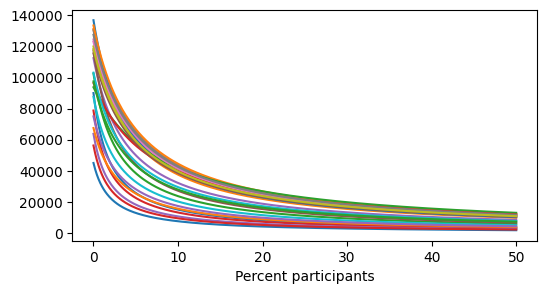

In [193]:
pct_range = np.arange(0, 50.1, 0.1)
treasure_list = []
for pct in pct_range:
    perc = np.ones(mult.shape) * pct
    treasure = calc_treasure(mult, hunt, perc)
    treasure_list.append(treasure.flatten())
cell_scores = []
for i in range(treasure_list[0].shape[0]):
    cell_scores.append([treasure[i] for treasure in treasure_list])
plt.figure(figsize=(6, 3))
for score in cell_scores:
    plt.plot(pct_range, score)
plt.xlabel('Percent participants')
plt.show()

In [194]:
mean_cell_scores = np.array([np.mean(score) for score in cell_scores]).reshape(mult.shape)

In [195]:
mean_cell_scores_ordered = np.sort(mean_cell_scores.reshape(25,))[::-1]

indices_ordered = []
for elem in mean_cell_scores_ordered:
    i, j = np.where(mean_cell_scores == elem)
    indices = i[0], j[0]
    indices_ordered.append(indices)

In [196]:
print(f'Coordinates: {indices_ordered[:3]}')

Coordinates: [(2, 1), (1, 2), (3, 2)]


In [197]:
indices_mean = indices_ordered[:3].copy()

In [198]:
for pct in range(5, 101, 5):
    pct_range = np.arange(0, pct + 0.1, 0.1)
    treasure_list = []
    for pct in pct_range:
        perc = np.ones(mult.shape) * pct
        treasure = calc_treasure(mult, hunt, perc)
        treasure_list.append(treasure.flatten())
    cell_scores = []
    for i in range(treasure_list[0].shape[0]):
        cell_scores.append([treasure[i] for treasure in treasure_list])
    mean_cell_scores = np.array([np.mean(score) for score in cell_scores]).reshape(mult.shape)
    mean_cell_scores_ordered = np.sort(mean_cell_scores.reshape(25,))[::-1]
    indices_ordered = []
    for elem in mean_cell_scores_ordered:
        i, j = np.where(mean_cell_scores == elem)
        indices = i[0], j[0]
        indices_ordered.append(indices)
    print(f'{int(pct):>3}% - Coordinates: {indices_ordered[:3]}')

  5% - Coordinates: [(2, 1), (1, 2), (2, 0)]
 10% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 15% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 20% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 25% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 30% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 35% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 40% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 45% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 50% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 55% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 60% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 65% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 70% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 75% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 80% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 85% - Coordinates: [(2, 1), (1, 2), (3, 2)]
 90% - Coordinates: [(2, 1), (1, 2), (2, 2)]
 95% - Coordinates: [(2, 1), (1, 2), (2, 2)]
100% - Coordinates: [(2, 1), (1, 2), (2, 2)]


# Uniform participant percentages

In [199]:
perc = np.ones(mult.shape) * 100 / np.size(mult)
perc

array([[4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.]])

In [200]:
treasure = calc_treasure(mult, hunt, perc)
treasures_ordered = np.sort(treasure.reshape(25,))[::-1]

indices_ordered = []
for elem in treasures_ordered:
    i, j = np.where(treasure == elem)
    indices = i[0], j[0]
    indices_ordered.append(indices)

In [201]:
print(f'Coordinates: {indices_ordered[:3]}')

Coordinates: [(2, 1), (1, 2), (3, 2)]


In [124]:
print(f'1  expedition reward: {treasures_ordered[0]}')
print(f'2 expeditions reward: {treasures_ordered[0] + treasures_ordered[1] - 25000}')
print(f'3 expeditions reward: {treasures_ordered[0] + treasures_ordered[1] + treasures_ordered[2] - 75000}\n')

1  expedition reward: 74166.66666666667
2 expeditions reward: 121666.66666666669
3 expeditions reward: 142500.0



# non-uiform participant percentages

In [202]:
perc = np.ones(mult.shape) * 100 / np.size(mult)

percs = [perc]
for _ in range(100):
    treasure = calc_treasure(mult, hunt, perc)
    perc = treasure / treasure.sum() * 100
    percs.append(perc)

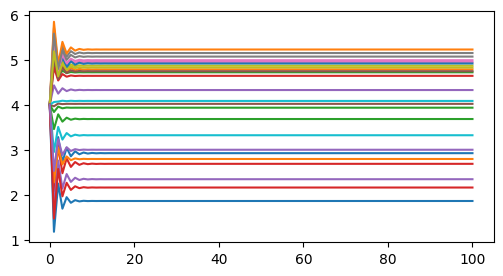

In [203]:
plt.figure(figsize=(6, 3))
for i in range(np.size(mult)):
    plt.plot([perc.flatten()[i] for perc in percs])
plt.show()

In [204]:
perc = percs[-1]
treasure = calc_treasure(mult, hunt, perc)
treasures_ordered = np.sort(treasure.reshape(25,))[::-1]

indices_ordered = []
for elem in treasures_ordered:
    i, j = np.where(treasure == elem)
    indices = i[0], j[0]
    indices_ordered.append(indices)

In [205]:
print(f'Coordinates: {indices_ordered[:3]}')

Coordinates: [(2, 1), (1, 2), (3, 2)]


In [206]:
print(f'1  expedition reward: {treasures_ordered[0]}')
print(f'2 expeditions reward: {treasures_ordered[0] + treasures_ordered[1] - 25000}')
print(f'3 expeditions reward: {treasures_ordered[0] + treasures_ordered[1] + treasures_ordered[2] - 75000}\n')

1  expedition reward: 65290.30230921034
2 expeditions reward: 104604.61758210906
3 expeditions reward: 117932.87457327131



In [207]:
indices_opt = indices_ordered[:3].copy()

# Modelling behaviour

In [259]:
indices_center = [(2, 1), (2, 2), (2, 3)]

In [262]:
perc_opt_selection = 10
perc_mean_selection = 20
perc_naive_selection = 60
perc_naive_2_selection = 5
perc_center_selection = 5
perc_rand_selection = 100 - perc_opt_selection - perc_mean_selection - perc_naive_selection - perc_naive_2_selection - perc_center_selection

new_perc = np.ones(mult.shape) * perc_rand_selection / 25
for ind in indices_opt:
    new_perc[ind] += perc_opt_selection / 3
for ind in indices_mean:
    new_perc[ind] += perc_mean_selection / 3
for ind in indices_naive:
    new_perc[ind] += perc_naive_selection / 3
for ind in indices_naive_2:
    new_perc[ind] += perc_naive_2_selection / 3
for ind in indices_center:
    new_perc[ind] += perc_center_selection / 3

new_treasure = calc_treasure(mult, hunt, new_perc)
new_treasures_ordered = np.sort(new_treasure.reshape(25,))[::-1]

new_indices_ordered = []
for elem in new_treasures_ordered:
    i, j = np.where(new_treasure == elem)
    indices = i[0], j[0]
    new_indices_ordered.append(indices)

print(f'Coordinates: {new_indices_ordered[:3]}')
print()
print(f'1  expedition reward: {new_treasures_ordered[0]}')
print(f'2 expeditions reward: {new_treasures_ordered[0] + new_treasures_ordered[1] - 25000}')
print(f'3 expeditions reward: {new_treasures_ordered[0] + new_treasures_ordered[1] + new_treasures_ordered[2] - 75000}\n')

Coordinates: [(1, 1), (1, 3), (3, 3)]

1  expedition reward: 123000.0
2 expeditions reward: 218000.0
3 expeditions reward: 286500.0



In [221]:
perc_opt_selection = 5
perc_mean_selection = 5
perc_naive_selection = 2
perc_naive_2_selection = 4
perc_center_selection = 3
perc_rand_selection = 2

new_perc = np.ones(mult.shape) * perc_rand_selection / 25
for ind in indices_opt:
    new_perc[ind] += perc_opt_selection / 3
for ind in indices_mean:
    new_perc[ind] += perc_mean_selection / 3
for ind in indices_naive:
    new_perc[ind] += perc_naive_selection / 3
for ind in indices_naive_2:
    new_perc[ind] += perc_naive_2_selection / 3
for ind in indices_center:
    new_perc[ind] += perc_center_selection / 3
new_perc = new_perc / new_perc.sum() * 100

new_treasure = calc_treasure(mult, hunt, new_perc)
new_treasures_ordered = np.sort(new_treasure.reshape(25,))[::-1]

new_indices_ordered = []
for elem in new_treasures_ordered:
    i, j = np.where(new_treasure == elem)
    indices = i[0], j[0]
    new_indices_ordered.append(indices)

print(f'Coordinates: {new_indices_ordered[:3]}')
print()
print(f'1  expedition reward: {new_treasures_ordered[0]}')
print(f'2 expeditions reward: {new_treasures_ordered[0] + new_treasures_ordered[1] - 25000}')
print(f'3 expeditions reward: {new_treasures_ordered[0] + new_treasures_ordered[1] + new_treasures_ordered[2] - 75000}\n')

Coordinates: [(1, 1), (1, 3), (3, 3)]

1  expedition reward: 114292.03539823007
2 expeditions reward: 200796.46017699112
3 expeditions reward: 260907.07964601764



In [243]:
ind_list = []
for perc_opt_selection in range(1, 10):
    for perc_mean_selection in range(1, 10):
        for perc_naive_selection in range(1, 10):
            for perc_naive_2_selection in range(1, 10):
                for perc_center_selection in range(1, 10):
                    for perc_rand_selection in range(1, 10):

                        new_perc = np.ones(mult.shape) * perc_rand_selection / 25
                        for ind in indices_opt:
                            new_perc[ind] += perc_opt_selection / 3
                        for ind in indices_mean:
                            new_perc[ind] += perc_mean_selection / 3
                        for ind in indices_naive:
                            new_perc[ind] += perc_naive_selection / 3
                        for ind in indices_naive_2:
                            new_perc[ind] += perc_naive_2_selection / 3
                        for ind in indices_center:
                            new_perc[ind] += perc_center_selection / 3
                        new_perc = new_perc / new_perc.sum() * 100
                        
                        new_treasure = calc_treasure(mult, hunt, new_perc)
                        new_treasures_ordered = np.sort(new_treasure.reshape(25,))[::-1]
                        
                        new_indices_ordered = []
                        for elem in new_treasures_ordered:
                            # i, j = np.where(new_treasure == elem)
                            indices = np.where(new_treasure.flatten() == elem)[0][0]
                            # indices = i[0], j[0]
                            new_indices_ordered.append(indices)
                        ind_list.extend(new_indices_ordered[:3])

In [254]:
np.unique(ind_list)

array([ 6,  8, 18], dtype=int64)

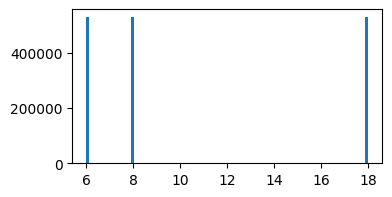

In [251]:
plt.figure(figsize=(4, 2))
plt.hist(ind_list, bins=100)
plt.show()

- 6:  (1, 1)
- 8:  (1, 3)
- 18: (3, 3)

In [255]:
[[0, 1, 2, 3, 4]] * 5

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]